## Employee Attrition
[Machine Learning as a Service]
***
For any company, employee attrition is a big challenge. It is easier to retain employees than recruit employees in the open market - especially if you are a mid market company.

Ms ABC, head of HR of a mid market company XYZ has hired you as a data scientist to help the team out by predicting which of the employees exhibit potential risk to attrite in the next month.

Her team has diligently gathered data and has shared them with you as a csv. The dataset has the following columns:

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments
- Salary
- Whether the employee has left - This is the target variable to be predicted

Problem and data source: https://github.com/amitkaps/full-stack-data-science/tree/master/employee-attrition

#### Work flow:  

#### Define
* Problem Statement

#### Discover
* Loading Packages and Data
    * Data Structure and Content
    * Clean data
* Exploratory Data Analysis
    * Univariate Analysis
    * Bivariate Analysis
* Establish a baseline
* Hypothesize solution

#### Develop
* Missing Value Treatment
* Feature Engineering
    * Encoding Categorical Variables
        * Label Encoding
        * One Hot Encoding
* PreProcessing Data
* Modeling
    * Create models
    * Test models
    * Select best model 
* Summary

#### Deploy
* Automate pipeline
* Deploy solution

### Problem statement
***
Help the team out by predicting which of the employees exhibit potential risk to attrite in the next month.

The aim is to build a predictive model to find out attributes/factors about or around each employee that would help the decision makers at Company XYZ be aware of these properties and propose possible retention strategies.

Below is a diagram of industry known attrition reasons. 

![title](../figures/employee_attrition.jpg)

What is the Cost of Turnover? The cost of turnover is the cost associated with turning over one position. This calculation includes the cost of hiring for that position, training the new employee, any severance or bonus packages, and managing the role when it is not filled. Every company will experience some turnover.

![title](../figures/employee_turnover_cost.jpg)
img source: https://www.teambonding.com/employee-turnover-formula/

### Tasks:
    
1. Discover likely reasons for staff attrition
2. Develop a model to determine the probality of an Employee leaving
3. Propose possible retention strategies

### Loading Packages and Data

In [68]:
#Load the libraries and configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_style(style='white')
sns.set();

In [72]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)

### Data Structure and Content

In [73]:
# Load dataset
df_data = pd.read_csv('../data/employee-attrition.csv')

In [74]:
df_data.rename(index=str, columns={"left": "turnover","number_project":"project_count","time_spend_company":"employment_duration","promotion_last_5years":"promotion"}, inplace=True)


In [75]:
# Dimensions of the dataset.
print(df_data.shape)

(14999, 10)


In [76]:
# Inspect the Data
df_data.head()

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,employment_duration,work_accident,promotion,department,salary,turnover
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [77]:
# Statistical summary of numerical all attributes.
df_data.describe()

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,employment_duration,work_accident,promotion,turnover
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [78]:
# Distribution
# number of instances (rows) that belong to each class
print(df_data.groupby('turnover').size())

turnover
0    11428
1     3571
dtype: int64


In [79]:
# print percentage of fraud
(len(df_data.loc[df_data.turnover==1])) / (len(df_data.loc[df_data.turnover == 0])) * 100

31.247812390619533

It can be observed that there exist a class imblance between Class "0" and "1".
"Class 1" is 19.91% of the dataset, this will be treated with various method of handling imbalanced dataset

In [80]:
# Missing values
df_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
project_count            0
average_monthly_hours    0
employment_duration      0
work_accident            0
promotion                0
department               0
salary                   0
turnover                 0
dtype: int64

There are no null/missing values

In [81]:
# Check for Duplicate values
df_data.duplicated().sum()

3008

In [82]:
# Clean Data: Remove duplicate records from dataframe
df_data.drop_duplicates(subset=None, keep='first', inplace=True)

There are duplicates records in the dataset that needs to be removed

In [83]:
# Confirm removal of duplicate values
df_data.duplicated().sum()

0

In [84]:
# check data types 
df_data.dtypes

satisfaction_level       float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
employment_duration        int64
work_accident              int64
promotion                  int64
department                object
salary                    object
turnover                   int64
dtype: object

### Exploratory data analysis (Univariate and Multivarate)


In [85]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features
#Missing values
#Numerical variables
#Distribution of the numerical variables
#Outliers
#Categorical variables
#Cardinality of the categorical variables
#Potential relationship between the variables and the target: SalePrice

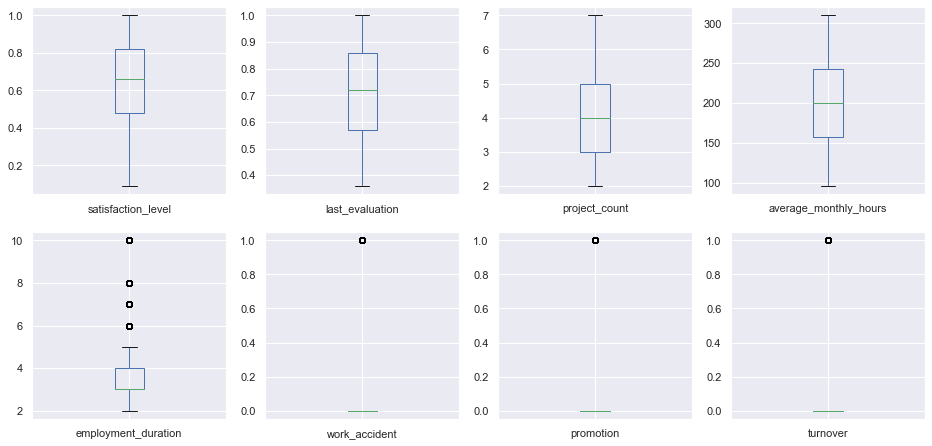

In [86]:
# Box plot of numerical attributes
df_data.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(16,20),)
plt.show()

the attributes 'time_spend_company','work_accident', 'promotion_last_5years'

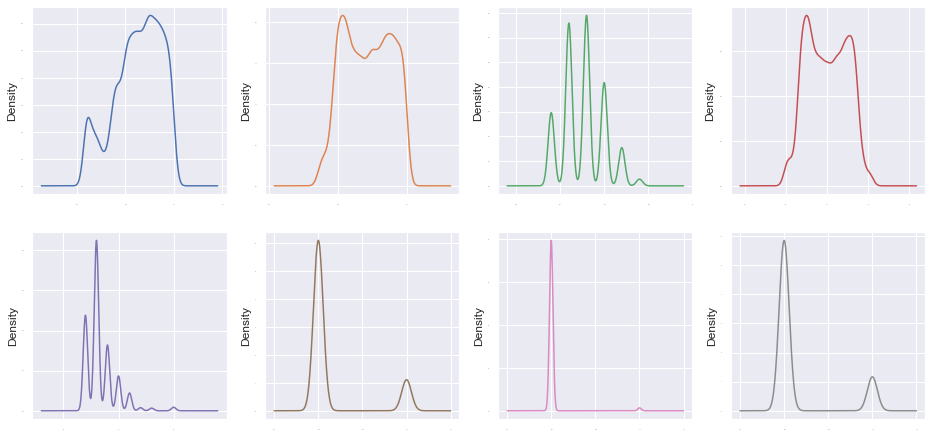

In [87]:
# Density plots of numerical attributes.
df_data.plot(kind= 'density' , subplots=True, sharex=False, legend=False, fontsize=1,figsize=(16,20),layout=(5,4))
plt.show()

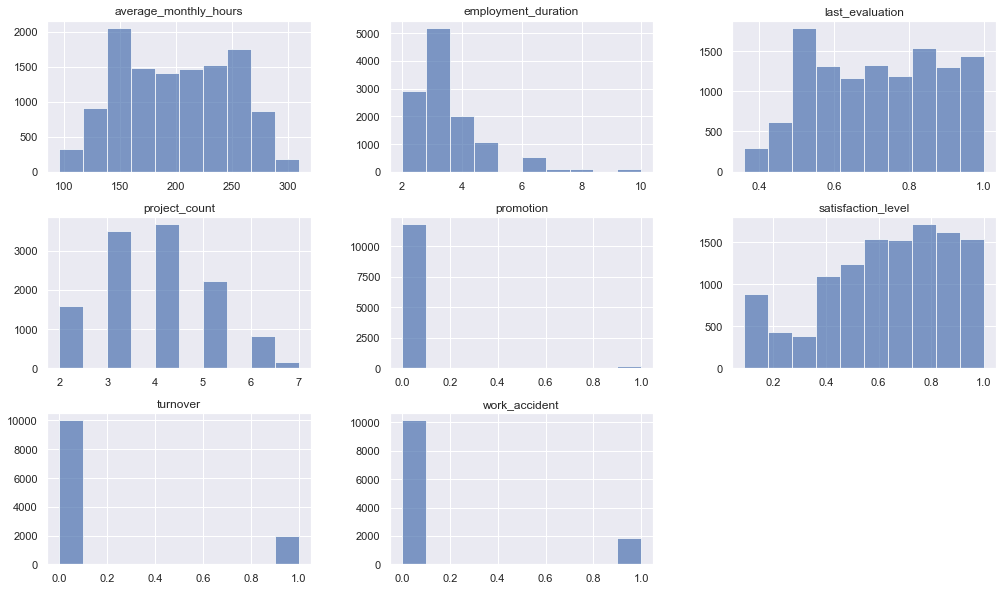

In [88]:
# histograms of numerical attributes
df_data.hist(figsize=(17,10),alpha=0.7)
plt.show()

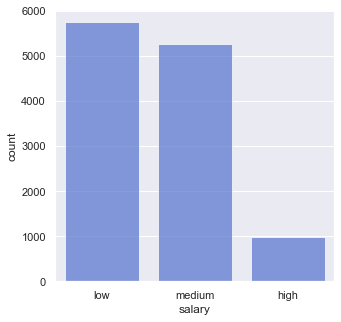

In [89]:
# The Salary attribute
ax = plt.subplots(figsize=(5,5))
sns.countplot(x='salary', data=df_data, color='royalBlue',alpha=0.7);

Employees with low salary amount are the highest population, while the employees with the high salary amount constitute a small fraction this could likely be management staff as the case is in business entities. 

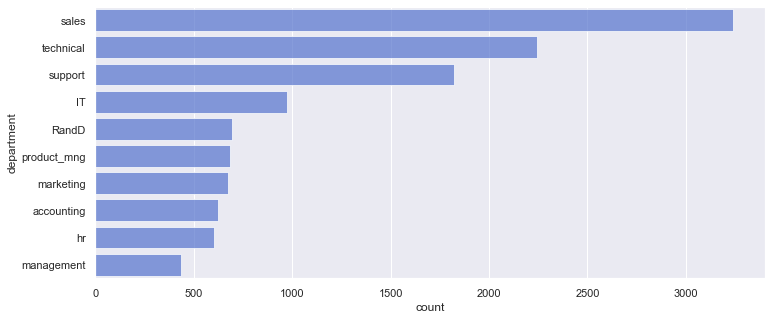

In [90]:
# The department attribute
ax = plt.subplots(figsize=(12,5))
sns.countplot(y='department', data=df_data,color='royalBlue',alpha=0.7, order=df_data['department'].value_counts().index);


#### Cardinality of the categorical variables

In [91]:
print(len(df_data['salary'].unique()), ' categories in salary')
print(len(df_data['department'].unique()), ' categories in department')

3  categories in salary
10  categories in department


All the categorical variables show low cardinality, this means that they have only few different labels.

#### Correlation between each feature and the target: turnover

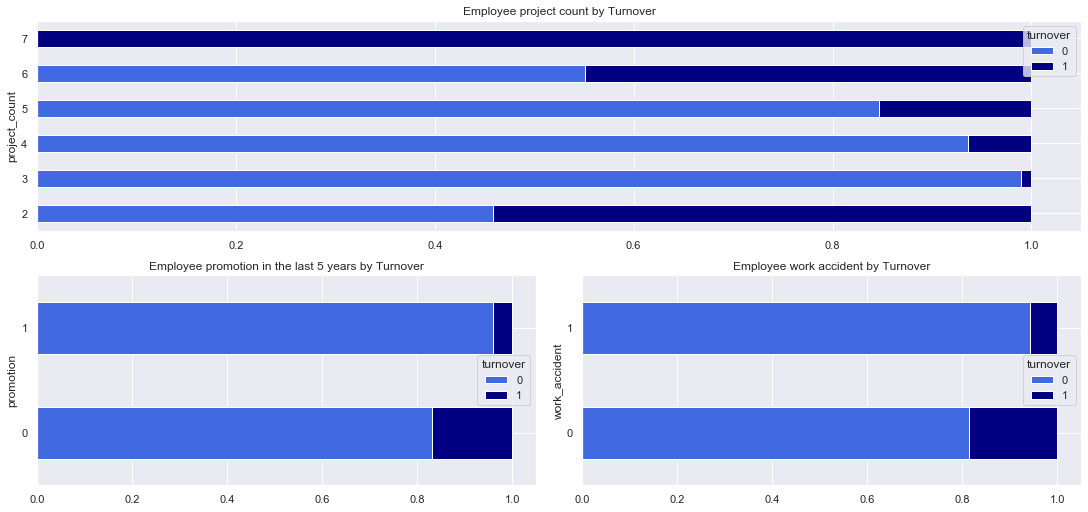

In [92]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
gs = GridSpec(2, 2, figure=fig, width_ratios=[8,8], height_ratios=[2,2])
# Configuring grid spec axis
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# project_count by turnover
project_count_turnover = pd.crosstab(df_data['project_count'], df_data['turnover'])
project_count_turnover.div(project_count_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax1, color=['royalBlue', 'navy'])
#format_spines(ax1, right_border=False)
ax1.set_title('Employee project count by Turnover')

# promotion by turnover
promotion_turnover = pd.crosstab(df_data['promotion'], df_data['turnover'])
promotion_turnover.div(promotion_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax2, color=['royalBlue', 'navy'])
#format_spines(ax2, right_border=False)
ax2.set_title('Employee promotion in the last 5 years by Turnover');

# work_accident by turnover
work_accident_turnover = pd.crosstab(df_data['work_accident'], df_data['turnover'])
work_accident_turnover.div(work_accident_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax3, color=['royalBlue', 'navy'])
#format_spines(ax3, right_border=False)
ax3.set_title('Employee work accident by Turnover');

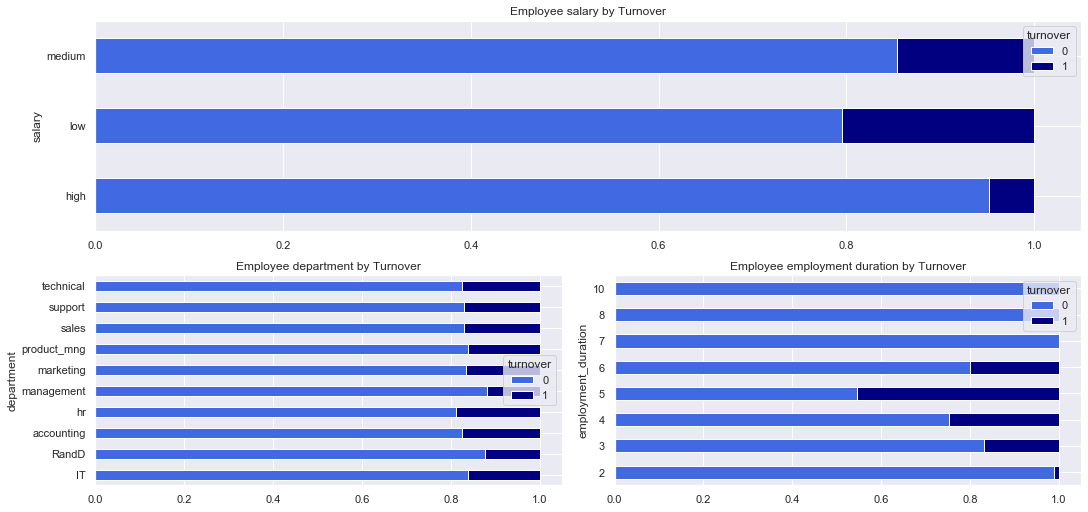

In [93]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(15, 7))
gs = GridSpec(2, 2, figure=fig, width_ratios=[8,8], height_ratios=[2,2])
# Configuring grid spec axis
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# salary by turnover
salary_turnover = pd.crosstab(df_data['salary'], df_data['turnover'])
salary_turnover.div(salary_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax1, color=['royalBlue', 'navy'])
#format_spines(ax1, right_border=False)
ax1.set_title('Employee salary by Turnover')

# department by turnover
department_turnover = pd.crosstab(df_data['department'], df_data['turnover'])
department_turnover.div(department_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax2, colors=['royalBlue', 'navy'])
#format_spines(ax2, right_border=False)
ax2.set_title('Employee department by Turnover');

# employment_duration by turnover
employment_duration_turnover = pd.crosstab(df_data['employment_duration'], df_data['turnover'])
employment_duration_turnover.div(employment_duration_turnover.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax3, colors=['royalBlue', 'navy'])
#format_spines(ax3, right_border=False)
ax3.set_title('Employee employment duration by Turnover');

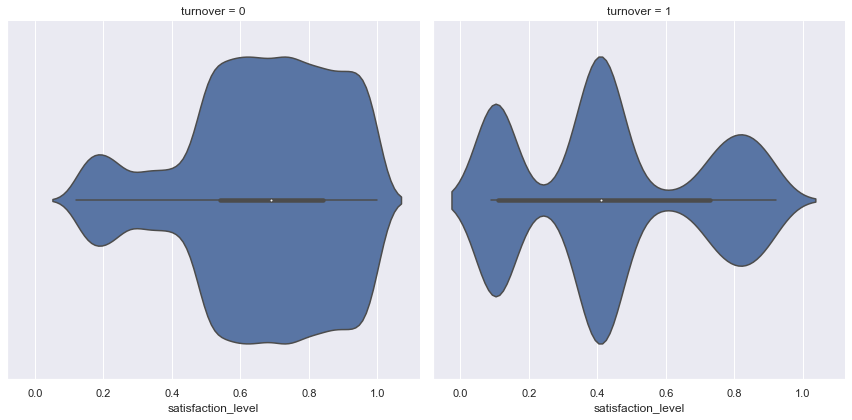

In [94]:
# Comparing the satisfaction_level and turnover attributes
sns.factorplot(x='satisfaction_level', col='turnover', kind='violin', data=df_data,  height=6);

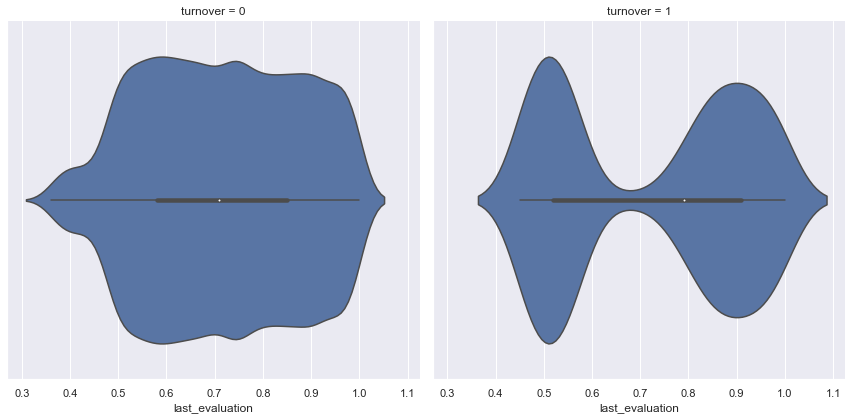

In [95]:
# Comparing the satisfaction_level and turnover attributes
sns.factorplot(x='last_evaluation', col='turnover', kind='violin', data=df_data,  height=6);

#### Correlation between features

,satisfaction_level,last_evaluation,project_count,average_monthly_hours,employment_duration,work_accident,promotion,turnover
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,0.019789,-0.350558
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,-0.007206,0.013520
project_count,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,-0.000544,0.030928
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,-0.004964,0.070409
employment_duration,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.056828,0.173295
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,0.029852,-0.125436
promotion,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,1.000000,-0.044657
turnover,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,-0.044657,1.000000


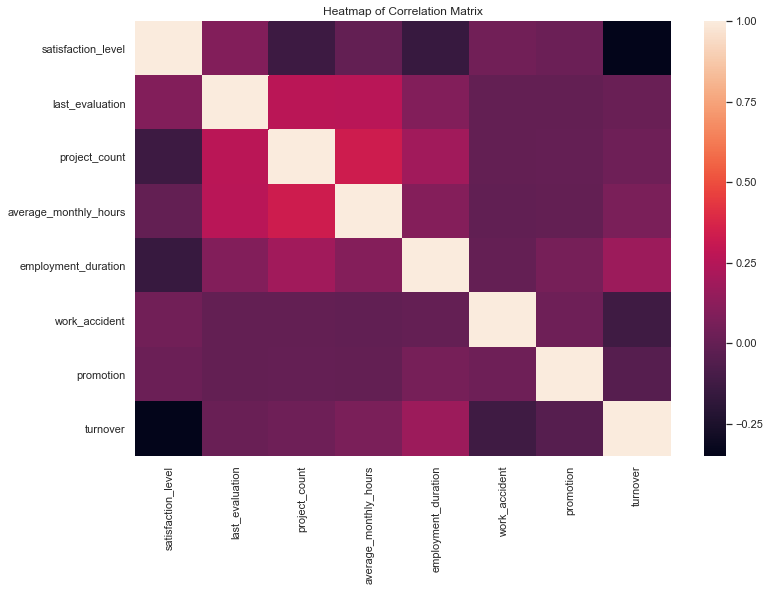

In [96]:
# Correlation matrix. What features correlate the most with turnover? What other correlations are there?
ax = plt.subplots(figsize=(12,8))
corr = df_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,)
plt.title('Heatmap of Correlation Matrix')
corr

### Establish a baseline

In [97]:
# create an extremely simple model and measure its efficacy
# e.g. using "average salary" for each industry as the model and then measure MSE
# for this classification project Sklearn DummyClassifier will be used to get a baseline

# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators

The stratified strategy option is used, it generates random predictions by respecting the training set class distribution.
A subset of features that most correlated with each other and the target attribute

In [98]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

dummy_features, dummy_target = df_data[['last_evaluation','project_count','average_monthly_hours','employment_duration']], df_data[['turnover']]
dummy_target[dummy_target != 1] = -1
dummy_features_train, dummy_features_test, dummy_target_train, dummy_target_test = train_test_split(dummy_features, dummy_target, random_state=0)

In [99]:
clf = DummyClassifier(strategy='stratified', random_state=0)
clf.fit(dummy_features_train, dummy_target_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')
print("Baseline score:", clf.score(dummy_features_test, dummy_target_test))

Baseline score: 0.7208138759172782


#### Hypothesize solution
Brainstorming 3 models that may improve results over the baseline model based (Baseline score: 0.72)

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

Logistic Regression
- Good for features with Linear relationships
- Interpretability

Random Forest
- Do not overfit (in theory)
- Good performance /accuracy
- Robust to noise
- Little if any parameter tuning required
- Apt for almost any machine learning problem

Support Vector Machine:
- Good performance
- Good of-the-shelf model in general for several scenarios
- Can approximate complex non-linear functions
- Supports Feature Scaling
- Robust to outliers

### Feature Engineering

In [100]:
# data encoding
categorical_var = ['department','salary','turnover','promotion']
numeric_var = ['satisfaction_level','last_evaluation','project_count','average_monthly_hours','employment_duration', 'work_accident']
df_categorical = pd.get_dummies(df_data[categorical_var], drop_first=True)
df_numerical = df_data[numeric_var]

df_data_new = pd.concat([df_categorical,df_numerical], axis=1)
df_data_new.head()

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,project_count,average_monthly_hours,employment_duration,work_accident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


#### Correlation of features

In [101]:
# select only numeric attributes
numeric_features = df_data_new.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['turnover'].sort_values(ascending=False)[:20], '\n')

turnover                  1.000000
employment_duration       0.173295
salary_low                0.099113
average_monthly_hours     0.070409
project_count             0.030928
department_hr             0.013567
last_evaluation           0.013520
department_technical      0.010000
department_sales          0.006154
department_support        0.006019
department_accounting     0.005955
department_marketing      0.000248
department_product_mng   -0.003768
department_management    -0.024417
department_RandD         -0.029016
promotion                -0.044657
salary_medium            -0.047214
work_accident            -0.125436
satisfaction_level       -0.350558
Name: turnover, dtype: float64 



In [102]:
#Class Imbalance fix.
#This is needed to ensure that our predictions are not off target due to the class imbalance.
df_data_new.turnover.value_counts(1)

0    0.833959
1    0.166041
Name: turnover, dtype: float64

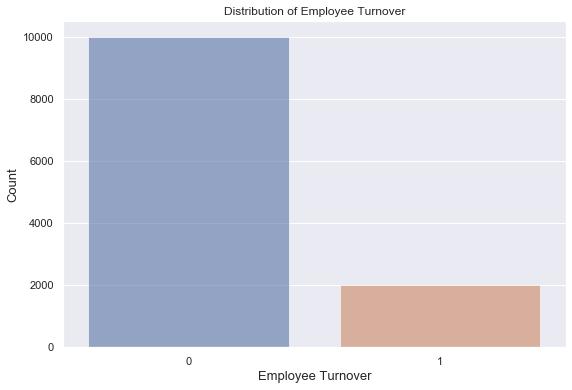

In [103]:
# Below is a graphical representation of the class imbalance

plt.figure(figsize=(9,6))
turnover = df_data_new.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=13)
plt.ylabel('Count', fontsize=13);

To fix the observed Class imbalance in the dataset, the following are possible ways to go about it:
- Oversampling
- Undersampling

### Modelling

#### Create models
Split-out Training and Test dataset


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

validation_size = 0.20
seed = 123

# Create the X and y set
features = df_data_new.iloc[:,1:]
target = df_data_new.iloc[:,0]

# Define train and test
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=validation_size, random_state=seed, stratify=target)

In [105]:
#
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE 

# Upsample minority class
features_train_u, target_train_u = resample(features_train[target_train == 1],
                                target_train[target_train == 1],
                                replace=True,
                                n_samples=features_train[target_train == 0].shape[0],
                                random_state=1)

features_train_u = np.concatenate((features_train[target_train == 0], features_train_u))
target_train_u = np.concatenate((target_train[target_train == 0], target_train_u))


# Downsample majority class
features_train_d, target_train_d = resample(features_train[target_train == 0],
                                target_train[target_train == 0],
                                replace=True,
                                n_samples=features_train[target_train == 1].shape[0],
                                random_state=1)
features_train_d = np.concatenate((features_train[target_train == 1], features_train_d))
target_train_d = np.concatenate((target_train[target_train == 1], target_train_d))


print("Original shape:", features_train.shape, target_train.shape)
print("Upsampled shape:", features_train_u.shape, target_train_u.shape)
print("Downsampled shape:", features_train_d.shape, target_train_d.shape)

Original shape: (9592, 18) (9592,)
Upsampled shape: (15998, 18) (15998,)
Downsampled shape: (3186, 18) (3186,)


In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
# cv and evaluation metric
num_folds = 10
scoring = 'f1'

In [108]:
# Spot-Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression(solver='liblinear')))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'GBC' , GradientBoostingClassifier()))


The algorithms all use default tuning parameters. To be displayed is the mean of accuracy for each algorithm as it is calculated, the results will be collected for later use.

The algorithm results are mean accuracy values. Cross-validation folds will aid in giving a better understanding of the algorithm performance. The box and whisker plots can be used to achieve this.

 
Training with Original data:
LR: 0.294895
RF: 0.943759
LDA: 0.330550
KNN: 0.846294
CART: 0.909605
NB: 0.563361
GBC: 0.943274


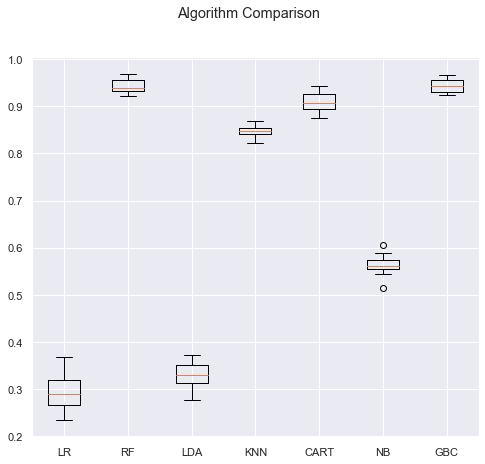

 
Training with Upsampled data:
LR: 0.807198
RF: 0.997372
LDA: 0.798950
KNN: 0.944013
CART: 0.989516
NB: 0.753233
GBC: 0.960018


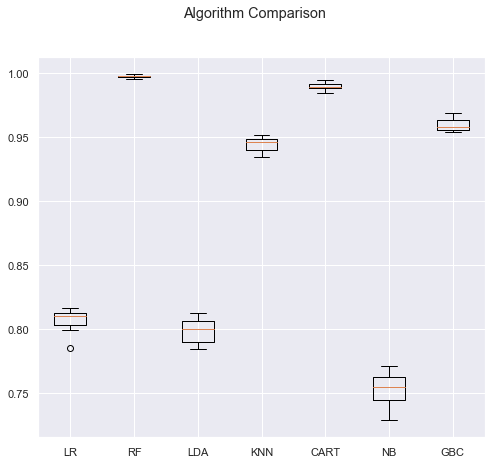

 
Training with Downsampled data:
LR: 0.802238
RF: 0.949159
LDA: 0.791341
KNN: 0.899764
CART: 0.935574
NB: 0.751043
GBC: 0.951650


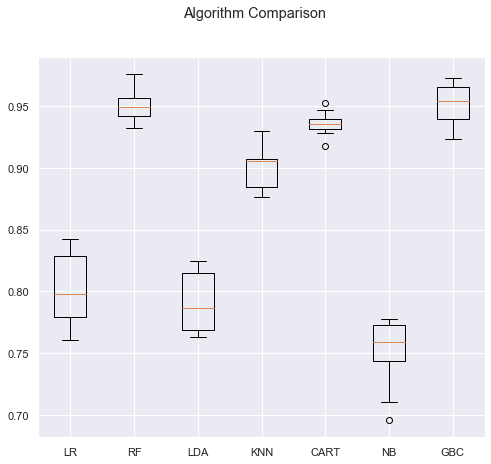

In [150]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (features_train, target_train),
                "Upsampled": (features_train_u, target_train_u),
                "Downsampled": (features_train_d, target_train_d)}

# Loop through each type of training sets and apply CV using on all the algorithms
for method in methods_data.keys():
    print(" ")
    print(f"Training with {method} data:")
    results = []
    names = []
    grid_data = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, methods_data[method][0], methods_data[method][1], cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f" % (name, cv_results.mean())
        print(msg)
        
    # Compare Algorithms
    fig = plt.figure(figsize=(8,7))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

From the train and cross validation result RandomForestClassifier, DecisionTreeClassifier and GradientBoostingClassifier
performed on all the datasets, this 3 will be selected for tuning and possibly ensemble.

In [151]:
# Make predictions on validation dataset with RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=seed)
rfc_model.fit(features_train_u, target_train_u)
predictions = rfc_model.predict(features_test)
print('accuracy_score')
print(accuracy_score(target_test, predictions))
print(' ')
print('confusion_matrix')
print(confusion_matrix(target_test, predictions))
print(' ')
print('classification_report')
print(classification_report(target_test, predictions))

accuracy_score
0.9812421842434348
 
confusion_matrix
[[1994    7]
 [  38  360]]
 
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.98      0.90      0.94       398

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [170]:
# Get Feature Importances
feature_importances = pd.DataFrame(rfc_model.feature_importances_,
                                   index = features_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

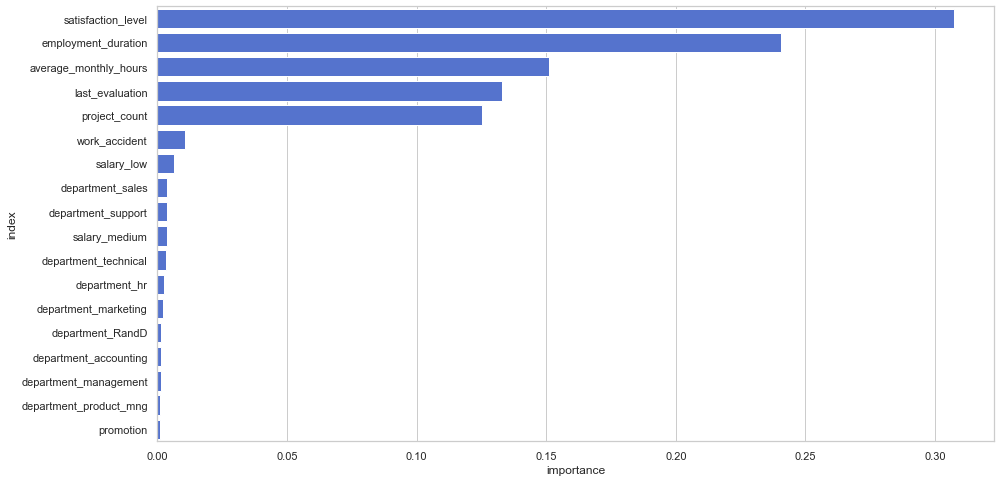

In [169]:
# Plot the Feature Importance
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="royalBlue")

The most important feaures are:
    - satisfaction_level
    - employment_duration
    - average_monthly_hours
    - last_evaluation
    - project_count

### Conclusion

### Save Model for API

In [ ]:
joblib.dump(rfc,'../model/rfc.pkl')